In [2]:
import matplotlib.pyplot as plt
import numpy as np
import heptools as ht
import mplhep as hep


In [3]:
signal_mass = np.load("bkgdelphes/npy/signal_mass.npy")
signal_bbmass = np.load("bkgdelphes/npy/signal_bb_mass.npy")

bkg1_mass = np.load("bkgdelphes/npy/bkg1_mass.npy")
bkg1_bbmass = np.load("bkgdelphes/npy/bkg1_bb_mass.npy")
bkg2_mass = np.load("bkgdelphes/npy/bkg2_mass.npy")
bkg2_bbmass = np.load("bkgdelphes/npy/bkg2_bb_mass.npy")
bkg3_mass = np.load("bkgdelphes/npy/bkg3_mass.npy")
bkg3_bbmass = np.load("bkgdelphes/npy/bkg3_bb_mass.npy")
bkg4_mass = np.load("bkgdelphes/npy/bkg4_mass.npy")
bkg4_bbmass = np.load("bkgdelphes/npy/bkg4_bb_mass.npy")

signal: Before cut: 500000 events, After cut: 64555 events

bkg 1 :Before cut: 100000 events, After cut: 7248 events

bkg 2 :Before cut: 100000 events, After cut: 3588 events

bkg 3 :Before cut: 100000 events, After cut: 27 events

bkg 4 :Before cut: 100000 events, After cut: 112 events

In [4]:
signal= ht.HEPExp()
signal.set_LHC(run='HL-LHC')
signal.set_xsec(0.01142, 'pb')
signal.set_simulation(500000)
bkg1 = ht.HEPExp()
bkg1.set_LHC(run='HL-LHC')
bkg1.set_xsec(2.073, 'pb')
bkg1.set_simulation(100000)
bkg2 = ht.HEPExp()
bkg2.set_LHC(run='HL-LHC')
bkg2.set_xsec(0.315, 'pb')
bkg2.set_simulation(100000)
bkg3 = ht.HEPExp()
bkg3.set_LHC(run='HL-LHC')
bkg3.set_xsec(116.2, 'pb')
bkg3.set_simulation(100000)
bkg4 = ht.HEPExp()
bkg4.set_LHC(run='HL-LHC')
bkg4.set_xsec(0.3564, 'pb')
bkg4.set_simulation(100000)

In [5]:
lumi=[
# signal.get_event()*44/500000,
# bkg1.get_event()*6286/100000,
# bkg2.get_event()*3239/100000,
# bkg3.get_event()*26/100000,
# bkg4.get_event()*108/100000
signal.get_event()*64555/500000,
bkg1.get_event()*7248/100000,
bkg2.get_event()*3588/100000,
bkg3.get_event()*27/100000,
bkg4.get_event()*112/100000
]
print(lumi)

[4423.3086, 450753.12, 33906.6, 94122.0, 1197.504]


In [6]:
mass_bins = np.linspace(0, 200, 50)
signal_mass_mean, signal_mass_std, signal_mass_bin_c = ht.calculate_hist_stats(
    signal_mass, int(lumi[0])+1, mass_bins)
bkg1_mass_mean, bkg1_mass_std, bkg1_mass_bin_c = ht.calculate_hist_stats(
    bkg1_mass, int(lumi[1])+1, mass_bins)
bkg2_mass_mean, bkg2_mass_std, bkg2_mass_bin_c = ht.calculate_hist_stats(
    bkg2_mass, int(lumi[2])+1, mass_bins)
bkg3_mass_mean, bkg3_mass_std, bkg3_mass_bin_c = ht.calculate_hist_stats(
    bkg3_mass, int(lumi[3])+1, mass_bins)
bkg4_mass_mean, bkg4_mass_std, bkg4_mass_bin_c = ht.calculate_hist_stats(
    bkg4_mass, int(lumi[4])+1, mass_bins)


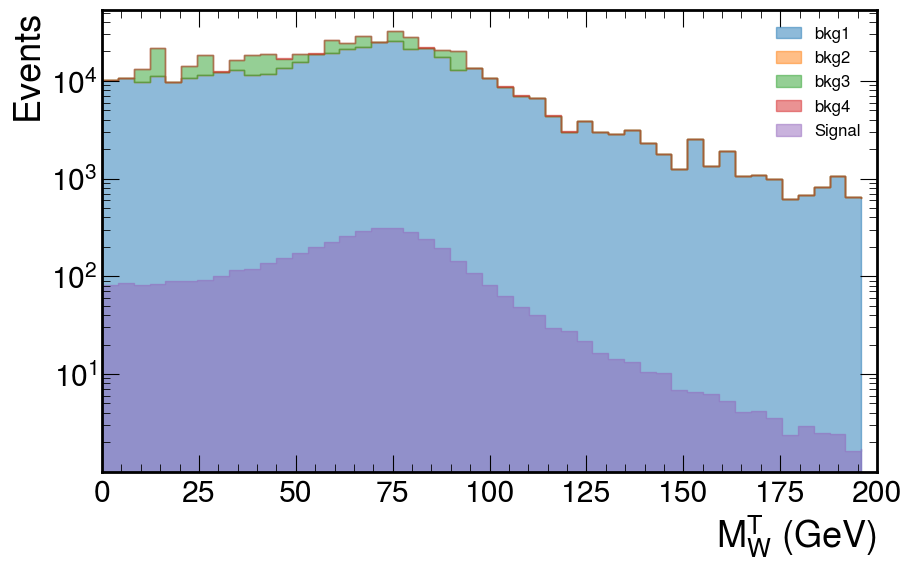

In [ ]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
plt.figure(figsize=(10, 6))
plt.style.use(hep.style.CMS)
# hep.cms.label(data=False, label="", lumi=3000)
plt.fill_between(mass_bins[:-1],0, bkg1_mass_mean,step='post',color=colors[0], alpha=0.5, label='bkg1')
plt.fill_between(mass_bins[:-1],bkg1_mass_mean, bkg1_mass_mean + bkg2_mass_std, step='post', color=colors[1], alpha=0.5, label='bkg2')
plt.fill_between(mass_bins[:-1], bkg1_mass_mean + bkg2_mass_std, bkg1_mass_mean + bkg2_mass_std + bkg3_mass_mean, step='post', color=colors[2], alpha=0.5, label='bkg3')
plt.fill_between(mass_bins[:-1], bkg1_mass_mean + bkg2_mass_std + bkg3_mass_mean, bkg1_mass_mean + bkg2_mass_std + bkg3_mass_mean + bkg4_mass_mean, step='post', color=colors[3], alpha=0.5, label='bkg4')
# plt.plot(mass_bins[:-1], signal_mass_mean, color=colors[4], label='Signal', linewidth=2)
plt.fill_between(mass_bins[:-1], 0, signal_mass_mean , step='post', color=colors[4], alpha=0.5, label='Signal')
plt.xlabel("$M^T_W$ (GeV)")
plt.ylabel("Events")
plt.xlim(0, 200)
# plt.ylim(0, 1000)
plt.yscale('log')
plt.legend(loc='upper right')

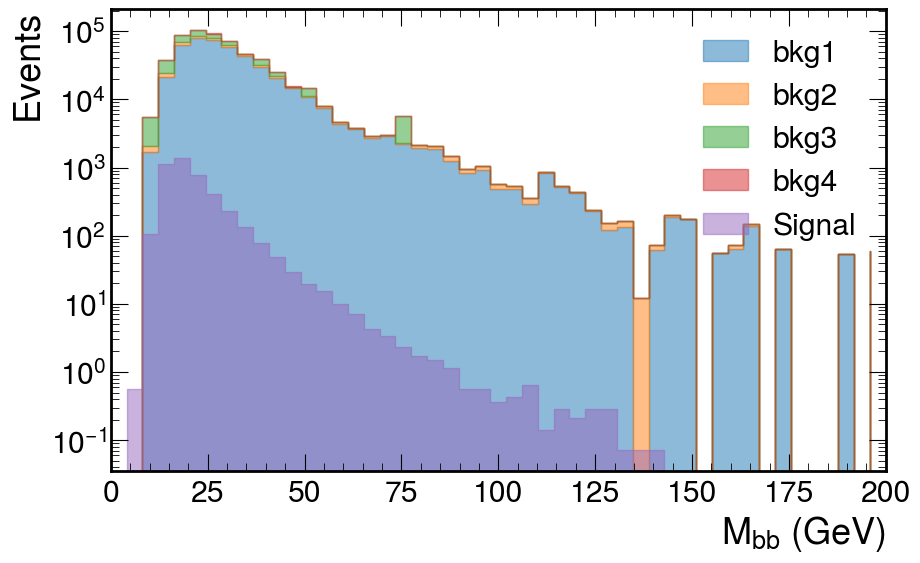

In [13]:
# define bins for bbmass
bbmass_bins = np.linspace(0, 200, 50)

# compute histogram statistics for bbmass
signal_bbmass_mean, signal_bbmass_std, _ = ht.calculate_hist_stats(
    signal_bbmass, int(lumi[0]) + 1, bbmass_bins)
bkg1_bbmass_mean, bkg1_bbmass_std, _ = ht.calculate_hist_stats(
    bkg1_bbmass, int(lumi[1]) + 1, bbmass_bins)
bkg2_bbmass_mean, bkg2_bbmass_std, _ = ht.calculate_hist_stats(
    bkg2_bbmass, int(lumi[2]) + 1, bbmass_bins)
bkg3_bbmass_mean, bkg3_bbmass_std, _ = ht.calculate_hist_stats(
    bkg3_bbmass, int(lumi[3]) + 1, bbmass_bins)
bkg4_bbmass_mean, bkg4_bbmass_std, _ = ht.calculate_hist_stats(
    bkg4_bbmass, int(lumi[4]) + 1, bbmass_bins)

# plot stacked bbmass distributions
plt.figure(figsize=(10, 6))
plt.style.use(hep.style.CMS)
# hep.cms.label(data=False, label="", lumi=3000)

# stack backgrounds
cum = np.zeros_like(bkg1_bbmass_mean)
for mean, color, label in [
    (bkg1_bbmass_mean, colors[0], "bkg1"),
    (bkg2_bbmass_mean, colors[1], "bkg2"),
    (bkg3_bbmass_mean, colors[2], "bkg3"),
    (bkg4_bbmass_mean, colors[3], "bkg4")
]:
    plt.fill_between(bbmass_bins[:-1], cum, cum + mean,
                     step='post', color=color, alpha=0.5, label=label)
    cum += mean

# overlay signal
plt.fill_between(bbmass_bins[:-1], 0, signal_bbmass_mean,
                 step='post', color=colors[4], alpha=0.5, label="Signal")

plt.xlabel("$M_{bb}$ (GeV)")
plt.ylabel("Events")
plt.xlim(0, 200)
plt.yscale("log")
plt.legend(loc='upper right')